In [1]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import pandas as pd # data processing

# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [2]:
df = pd.read_csv('data.csv')

# Работа с датафреймом

In [3]:
df.dtypes.value_counts()

object     45
float64    38
int64       5
dtype: int64

In [4]:
df.columns.shape

(88,)

Заполните пропуски:

1. В датасете 88 переменных
2. Из них числовых 43

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений

In [23]:
sns.set_theme()

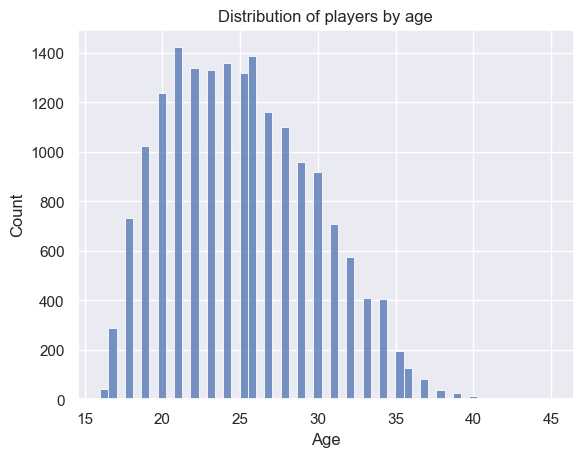

In [24]:
sns.histplot(df, x="Age")
plt.title('Distribution of players by age');

С 16 до 21 количество возрастает с каждым годом. Больше всего в возрасте от 21 до 26, далее количество идет на спад. Максимальный возраст - 45 лет.

5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

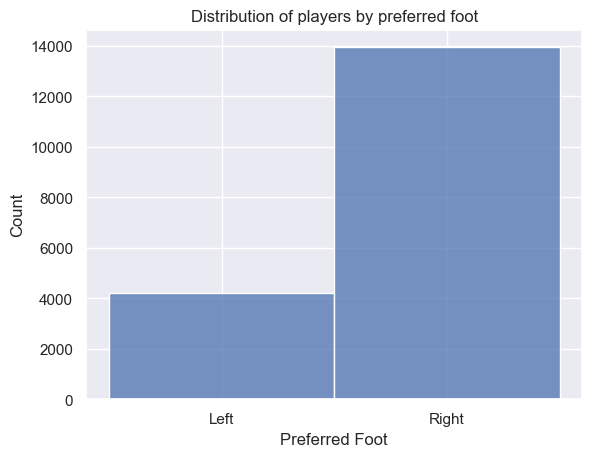

In [33]:
sns.histplot(df, x="Preferred Foot")
plt.title('Distribution of players by preferred foot');

Количество "правшей" в 3.5 раза больше, чем "левшей".

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом?

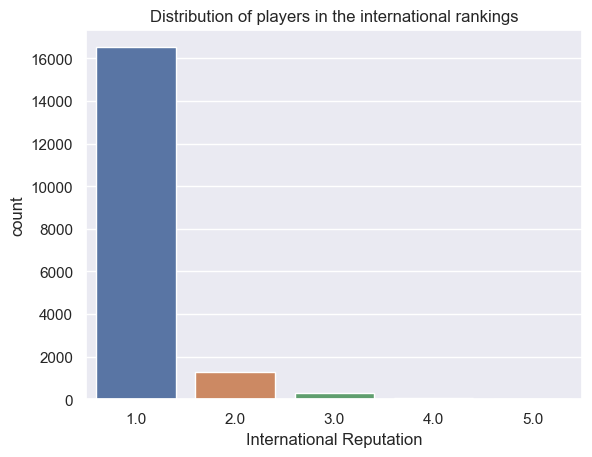

In [34]:
sns.countplot(df, x="International Reputation")
plt.title("Distribution of players in the international rankings");

In [11]:
def distribution_in_the_reputation(column):
    for i in range(1, 6):
        plt.figure(figsize=(9, 3))

        select_count = df[df['International Reputation'] == i] \
            .groupby(column) \
            .agg({'ID': 'count'})

        total_count = df \
            .groupby(column) \
            .agg({'ID': 'count'})

        raiting = (select_count['ID'] / total_count['ID']).fillna(0)

        plt.plot(raiting.sort_values().reset_index(drop=True))
        plt.title(f'Share of the {column.lower()} in the ranking for {i}')
        plt.xlabel(column)
        plt.ylabel("Share")
        plt.show()

def mean_by_reputation(column):
    plt.figure(figsize=(9, 3))
    plt.title(f'Average reputation by {column.lower()}')
    plt.xlabel(column)
    plt.ylabel("Share")
    plt.plot(
        df.groupby(column) \
            .agg({'International Reputation': 'mean'}) \
            .sort_values(by='International Reputation') \
            .reset_index(drop=True)
    );

def most_successful_in_reputation(column, height):
    most_successful = df.groupby(column, as_index=False) \
        .agg({'International Reputation': 'mean'}) \
        .rename(columns={'International Reputation' : 'Share'}) \
        .sort_values(by='Share') \
        .query('Share > Share.quantile(q=0.95)')


    plt.figure(figsize=(7, height))
    plt.title(f'{column} with the highest reputation')
    sns.barplot(
        data=most_successful,
        y=column,
        x='Share',
    );

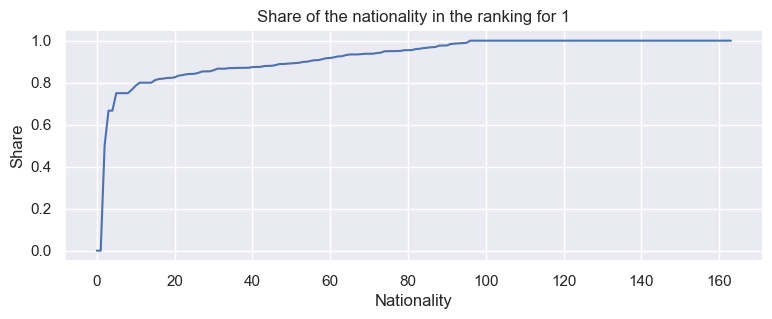

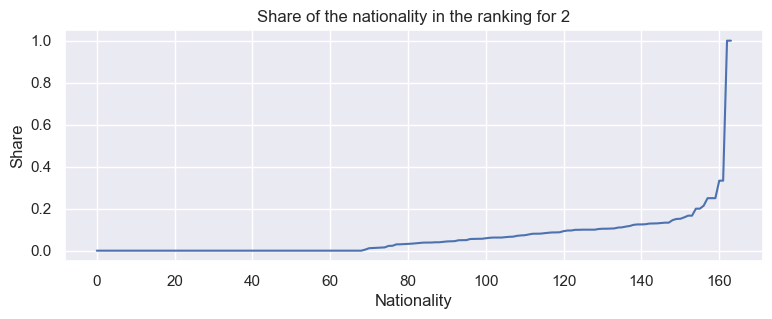

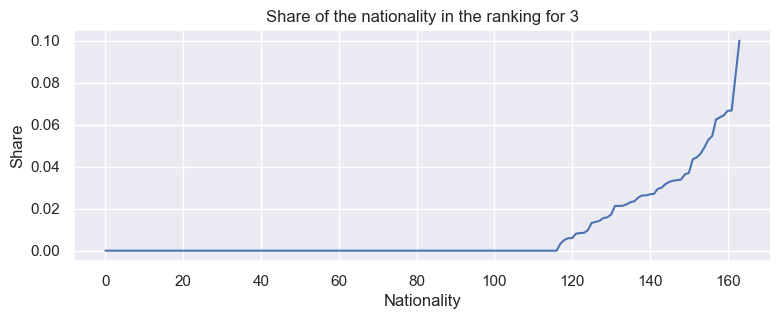

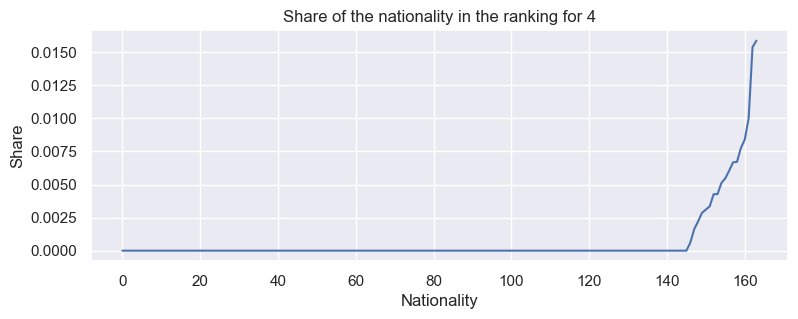

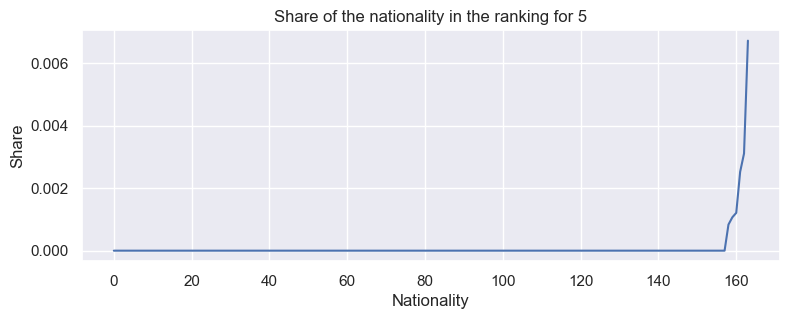

In [12]:
distribution_in_the_reputation('Nationality')

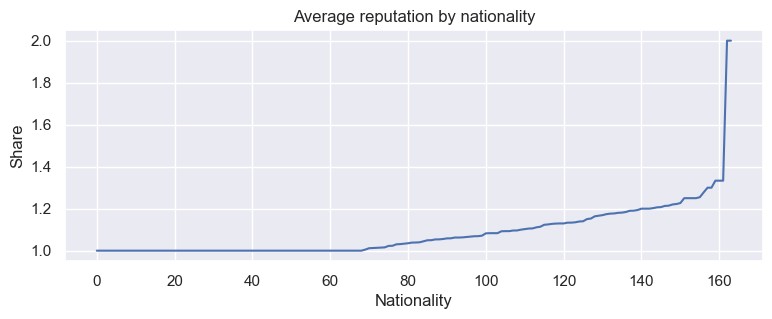

In [13]:
mean_by_reputation('Nationality')

Международный рейтинг ассоциирован с национальностью. Мы наблюдаем национальности, футболисты которой полностью находятся в определенной группе.

Среди наиболее успешных национальностей можно выделить:

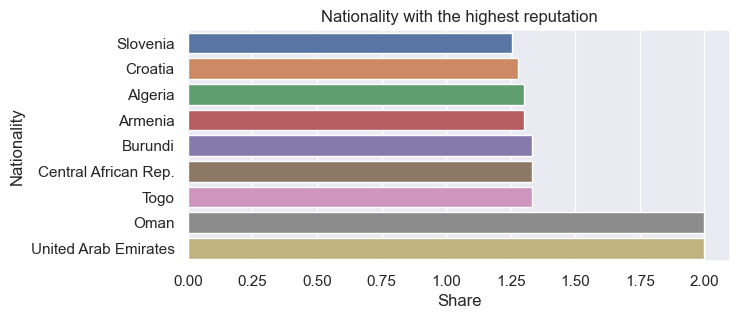

In [14]:
most_successful_in_reputation('Nationality', 3)

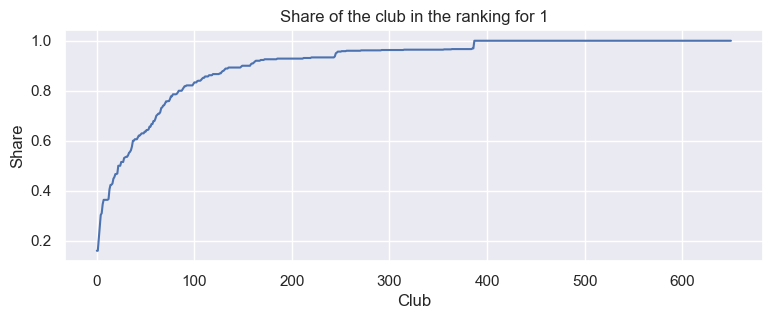

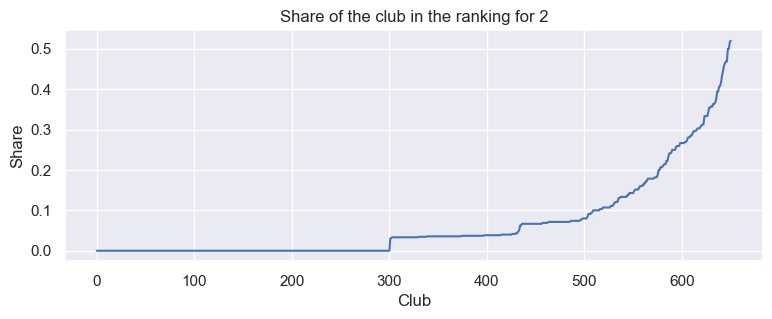

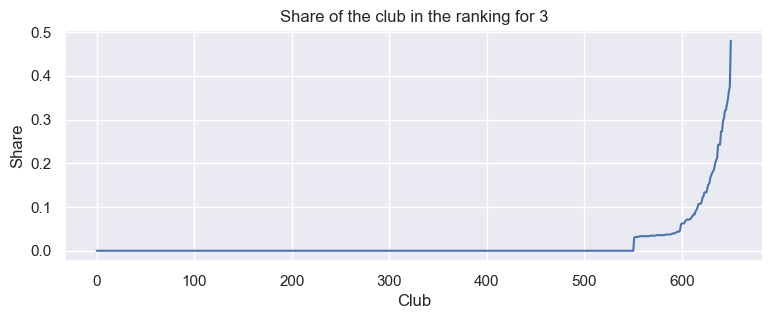

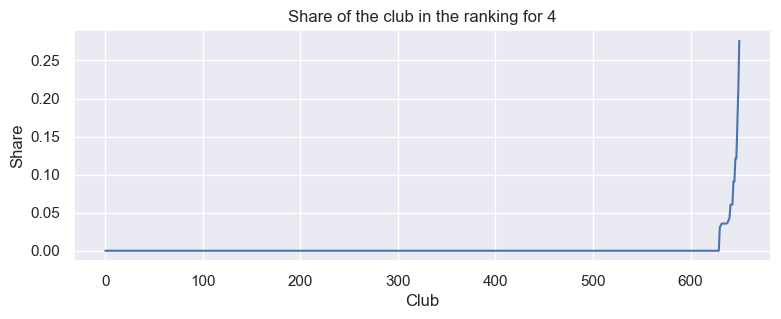

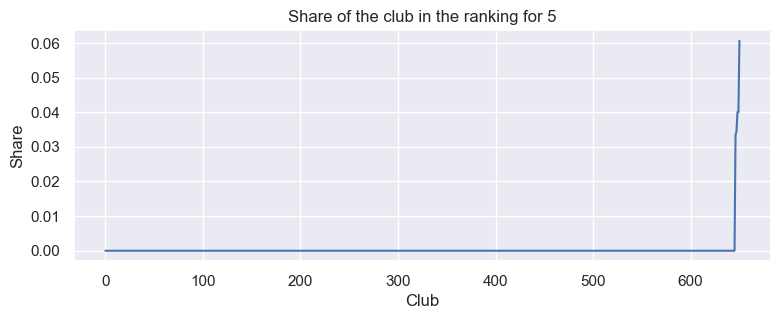

In [15]:
distribution_in_the_reputation('Club')

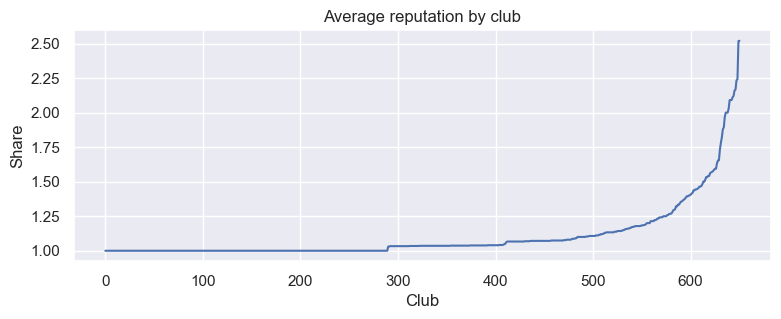

In [16]:
mean_by_reputation('Club')

Международный рейтинг ассоциирован с клубом.

Среди наиболее успешных клубов можно выделить:

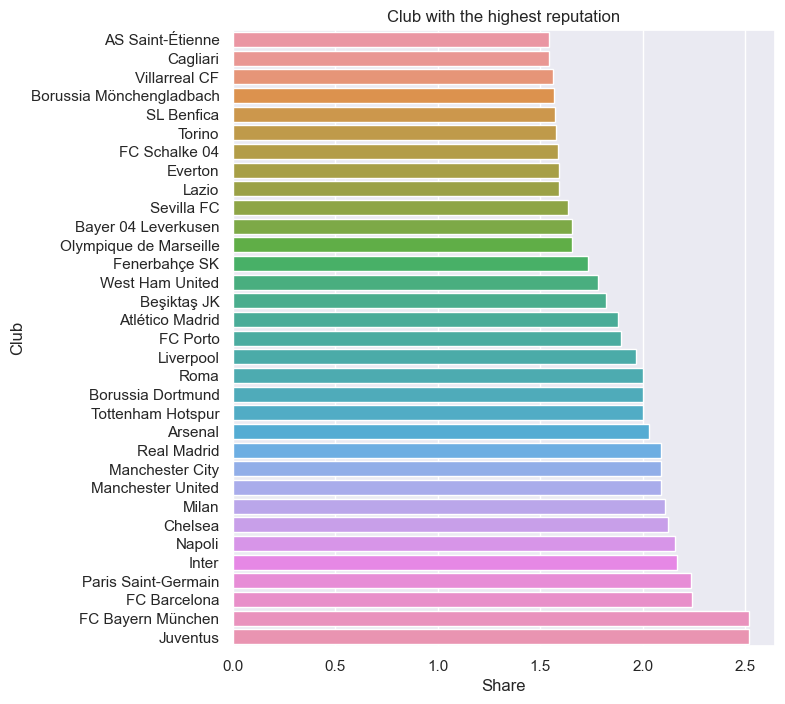

In [78]:
most_successful_in_reputation('Club', 8)

9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться?


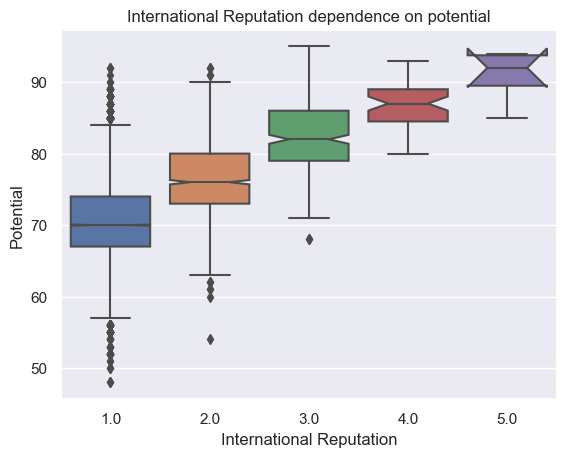

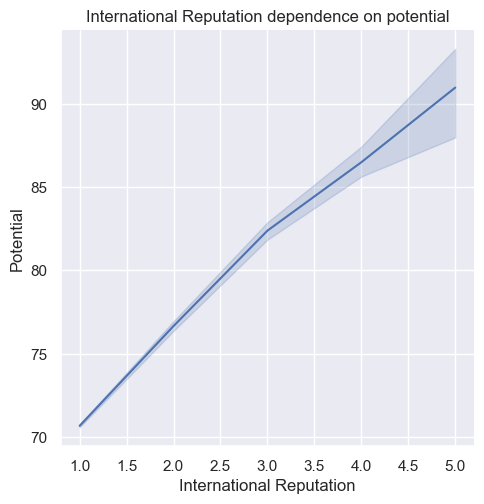

In [79]:
sns.boxplot(
    x="International Reputation",
    y="Potential",
    data=df,
    notch=True,
);
plt.title('International Reputation dependence on potential');


sns.relplot(
    x="International Reputation",
    y="Potential",
    data=df,
    kind='line',
);
plt.title('International Reputation dependence on potential');


Существует линейная зависимость между потенциалом и междунарном рейтингом, но наличие выбросов показывает, что это не всегда выполняется и есть несколько футболистов с высоким уровнем потенциала, но с низким рейтингом.

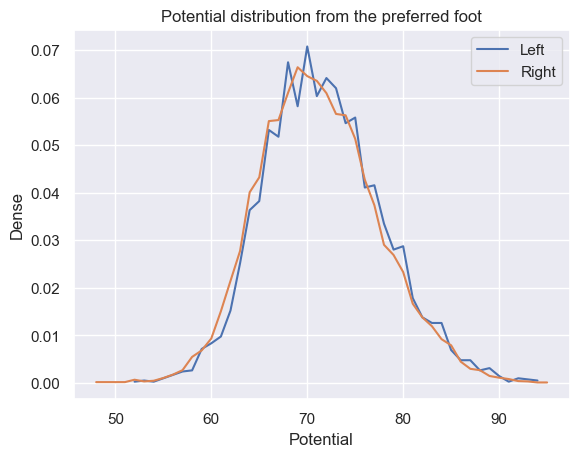

In [80]:
foots = df["Preferred Foot"].dropna().unique()
for foot in foots:
    df1 = df[df["Preferred Foot"] == foot]['Potential'] \
        .value_counts(normalize=True) \
        .reset_index() \
        .sort_values(by=['index'])
    plt.plot(df1['index'], df1['Potential'])

plt.legend(foots)
plt.title('Potential distribution from the preferred foot')
plt.xlabel('Potential')
plt.ylabel('Dense')
plt.show()

Игровая нога никак не влияет на потенциал.

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость?



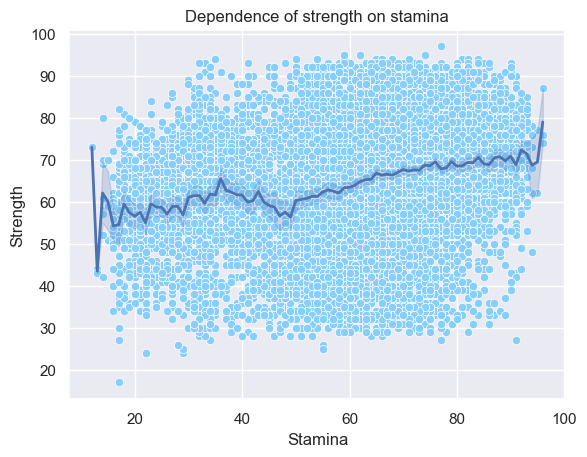

In [81]:
plt.title('Dependence of strength on stamina')
sns.scatterplot(
    data=df,
    x='Stamina',
    y='Strength',
    linewidth=0.5,
    color='lightskyblue'
)

sns.lineplot(
    data=df,
    x='Stamina',
    y='Strength',
    linewidth=2,
);

Выносливость не сильно влияет на силу удара.

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

In [82]:
def value(x):
    if x.endswith('M'):
        return round(float(x[1:-1])) * 1000000

    if x.endswith('K'):
        return round(float(x[1:-1])) * 1000

    return round(float(x[1:]))

df['Value'] = df['Value'].apply(value)

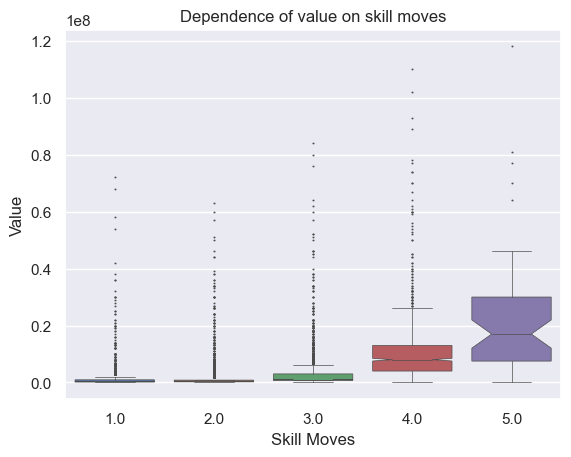

In [83]:
plt.title('Dependence of value on skill moves')
sns.boxplot(
    y="Value",
    x="Skill Moves",
    data=df,
    notch=True,
    fliersize=0.5,
    linewidth=0.5
);

В среднем, с увеличением количества "финтов" стоимость игрока возрастает, но существуют и исключения.

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

In [84]:
df['Weight'] = df['Weight'].apply(
    lambda x: int(x[:-3]) if isinstance(x, str) else x
)
df['Height'] = df['Height'].apply(
    lambda x: float(x.replace('\'', '.')) if isinstance(x, str) else x
)

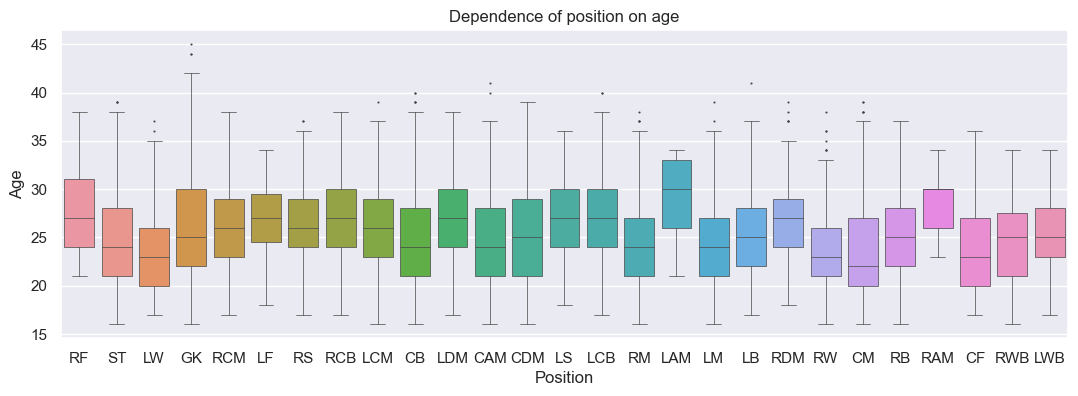

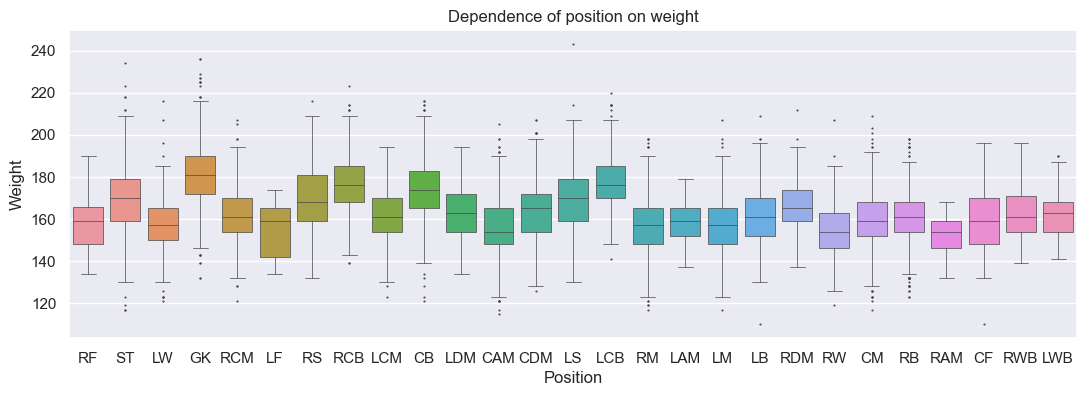

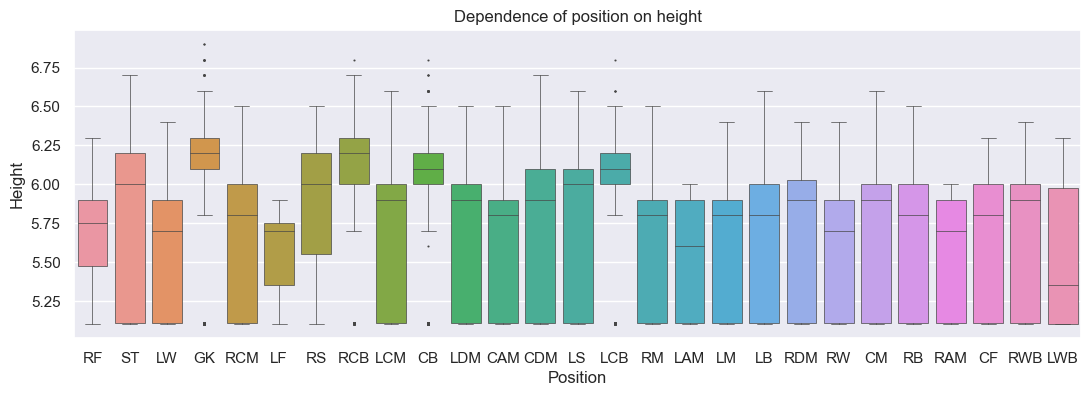

In [85]:
for column in ['Age', 'Weight', 'Height']:
    plt.figure(figsize=(13, 4))
    plt.title(f'Dependence of position on {column.lower()}')
    sns.boxplot(
        data=df,
        y=column,
        x='Position',
        fliersize=0.6,
        linewidth=0.5
    )
    plt.show()

1. Возраст
    + Наибольший диапозон среди GK
    + Наименьший диапозон среди RAM
    + Группа с наименьшим возрастом - LW
    + Группа с наибольшим возрастом - LAM
2. Вес
    + Наибольший диапозон среди ST
    + Наименьший диапозон среди RAM
    + Группа с наименьшим весом - RAM
    + Группа с наибольшим весом - GK
3. Рост
    + Больше всего рост важен для GK, RCB, CB и LCB
    + Наибольший диапозон среди ST
    + Наименьший диапозон среди LCB
    + Группа с наименьшим рост - LAM
    + Группа с наибольшим возрастом - GK

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

In [86]:
anthropometry = df.groupby(['Weight', 'Height'], as_index=False) \
    .agg({'SprintSpeed' : 'mean'}) \
    .pivot(index='Weight', columns='Height', values='SprintSpeed') \
    .fillna(0)

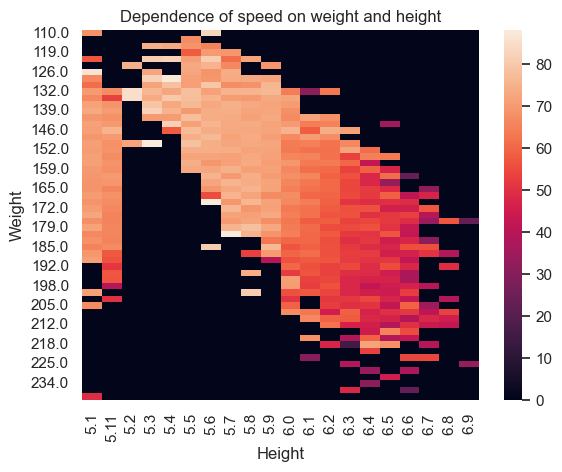

In [87]:
plt.title("Dependence of speed on weight and height")
sns.heatmap(anthropometry);

Чем меньший рост и вес имеет игрок, тем выше его скорость. При этом показатель веса оказывает большее влияние.

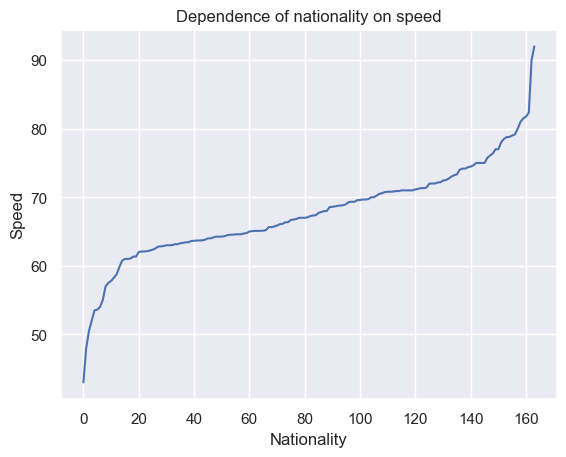

In [88]:
speed = df \
    .groupby('Nationality') \
    .agg({'SprintSpeed': 'mean'}) \
    .sort_values(by='SprintSpeed') \
    .reset_index()

plt.title('Dependence of nationality on speed')
plt.xlabel('Nationality')
plt.ylabel('Speed')
plt.plot(speed['SprintSpeed']);

Национальность влияет на скорость.

Наиболее быстрые национальности:

In [89]:
def draw_nationality(df, title):
    plt.figure(figsize=(7, 5))
    plt.title(f'{title} nationality')
    sns.barplot(
        data=df,
        y='Nationality',
        x='SprintSpeed',
    );

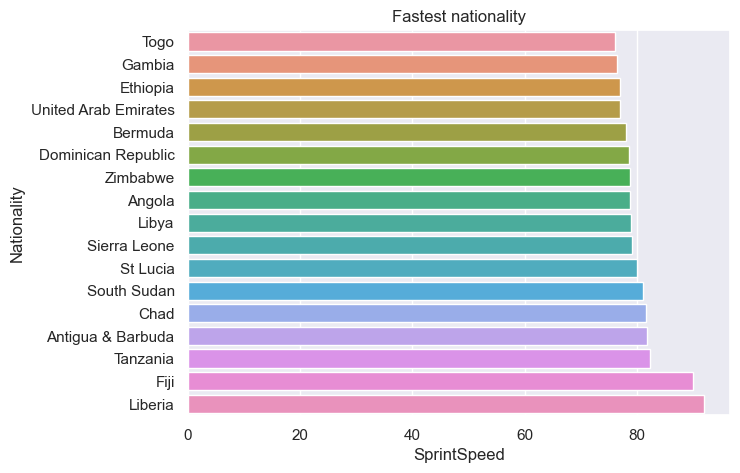

In [90]:
fastest = speed[speed['SprintSpeed'] > speed['SprintSpeed'].quantile(q=0.9)]

draw_nationality(fastest, 'Fastest')

Наиболее медленные национальности:

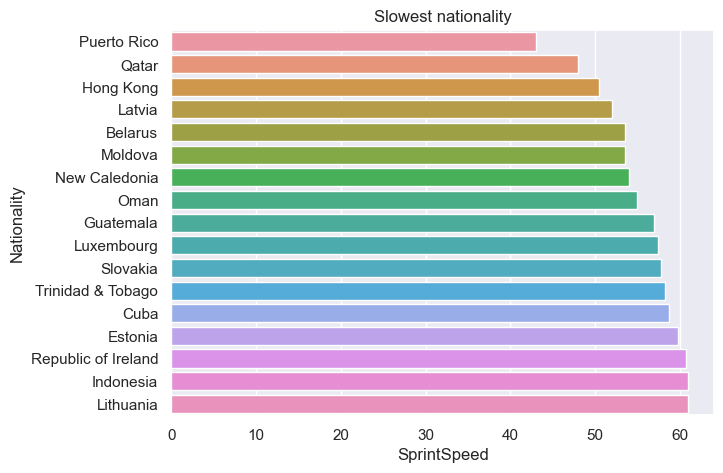

In [91]:
slowest = speed[speed['SprintSpeed'] < speed['SprintSpeed'].quantile(q=0.1)]

draw_nationality(slowest, 'Slowest')

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

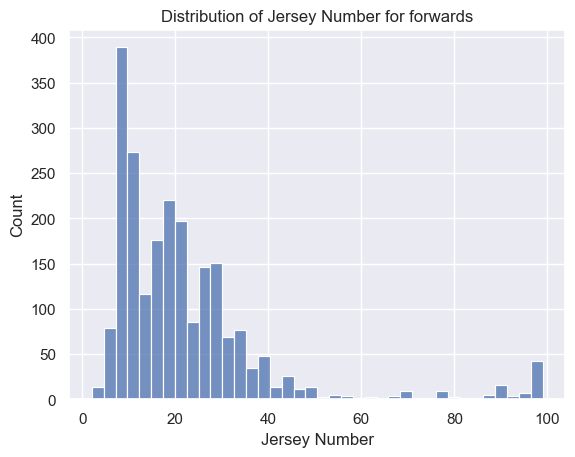

In [26]:
forwards = df[df['Position'].apply(lambda x: x in ['RF', 'ST', 'CF', 'LF'])]

sns.histplot(
    x = forwards['Jersey Number'],
)

plt.title('Distribution of Jersey Number for forwards');

Нападающие чаще всего играют под 9, 11 и 19 номерами.

16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)?


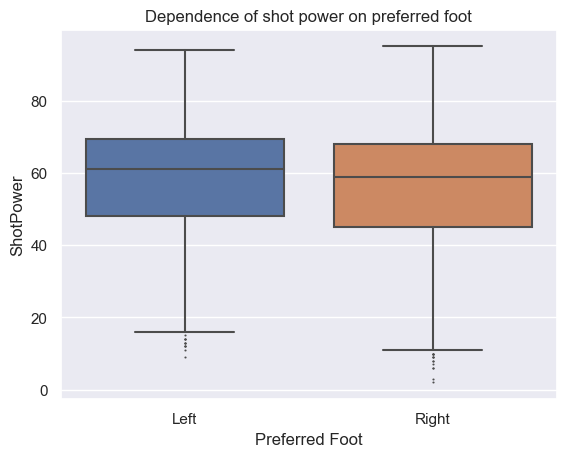

In [93]:
plt.title('Dependence of shot power on preferred foot')

sns.boxplot(
    data=df,
    y="ShotPower",
    x='Preferred Foot',
    fliersize=0.6
);

Явной зависимости силы удара от ведущей ноги нет, но у "левшей" она немного выше.

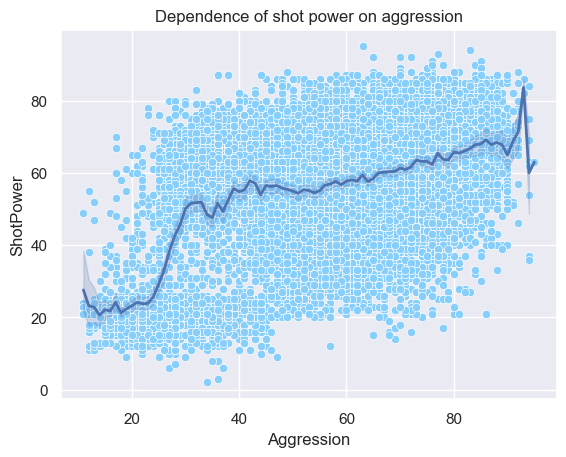

In [94]:
plt.title('Dependence of shot power on aggression')

sns.scatterplot(
    data=df,
    y="ShotPower",
    x='Aggression',
    color='lightskyblue'
)

sns.lineplot(
    data=df,
    y="ShotPower",
    x='Aggression',
    linewidth=2

);

В среднем, сила удара возрастает при повышении агрессивности.

17. Найдите суммарную стоимость игроков в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

In [95]:
total_value = df.groupby('Club').agg({'Value': 'sum'}).reset_index()
total_value.head(10)

,Club,Value
0,SSV Jahn Regensburg,22195000
1,1. FC Heidenheim 1846,26690000
2,1. FC Kaiserslautern,15195000
3,1. FC Köln,134810000
4,1. FC Magdeburg,21125000
5,1. FC Nürnberg,75540000
6,1. FC Union Berlin,51485000
7,1. FSV Mainz 05,138755000
8,AC Ajaccio,18130000
9,AC Horsens,8420000


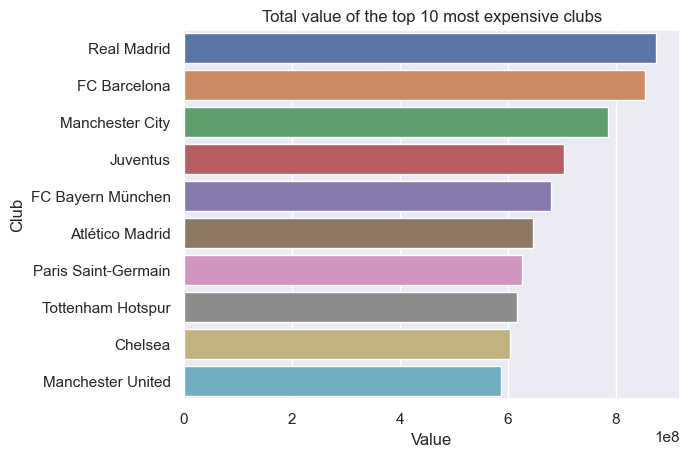

In [96]:
plt.title("Total value of the top 10 most expensive clubs")

sns.barplot(
    data=total_value.nlargest(10, 'Value'),
    y='Club',
    x='Value',
);

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью?

In [27]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until']).dt.year
df['Joined'] = pd.to_datetime(df['Joined']).dt.year
df['Duration'] = df['Contract Valid Until'] - df['Joined']

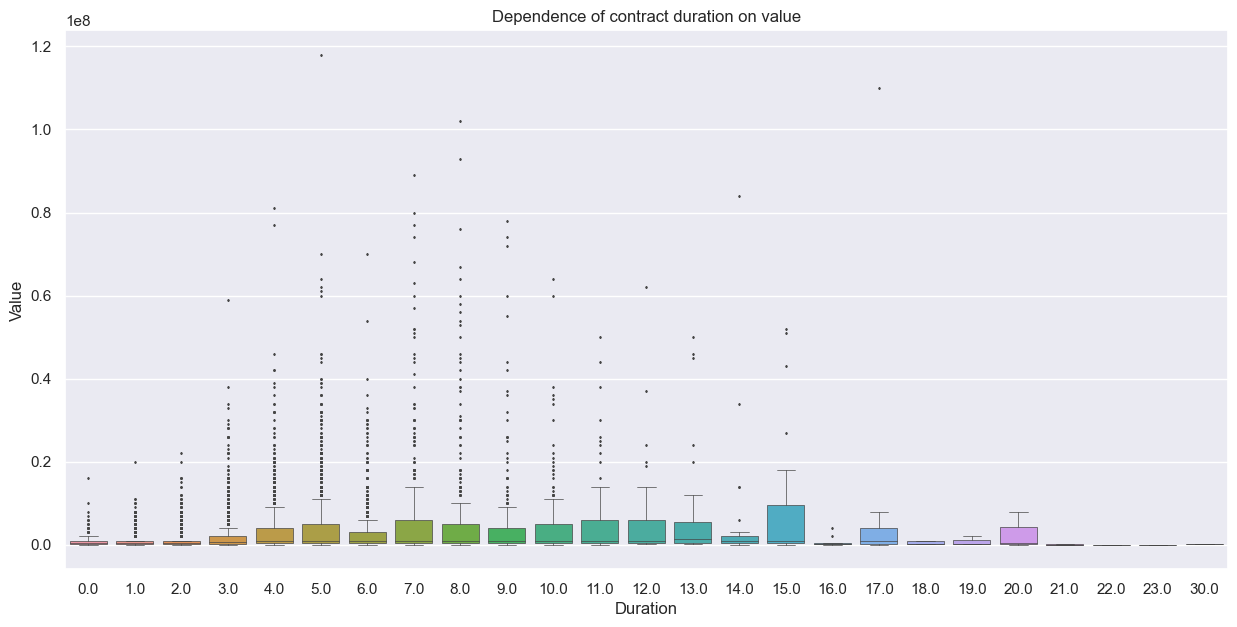

In [98]:
plt.figure(figsize=(15, 7))
plt.title('Dependence of contract duration on value')

sns.boxplot(
    data=df,
    y='Value',
    x='Duration',
    linewidth=0.5,
    fliersize=1
);

Меньшую стоимость имеют игроки с небольшой продолжительностью контракта, либо с наиболее длительными.

20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

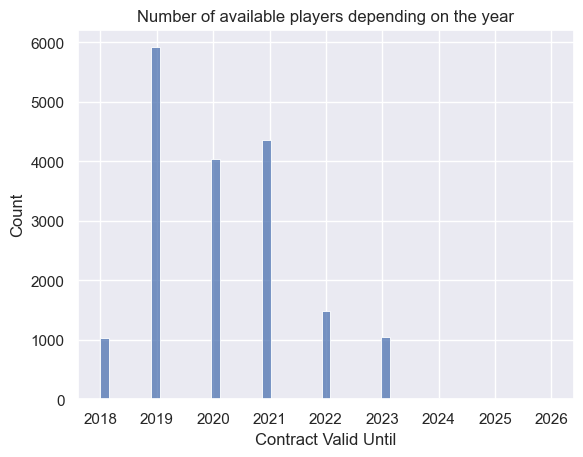

In [32]:
sns.histplot(x=df['Contract Valid Until'])
plt.title('Number of available players depending on the year');

Больше всего свободных игроков на рынке было в 2019 году.

21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

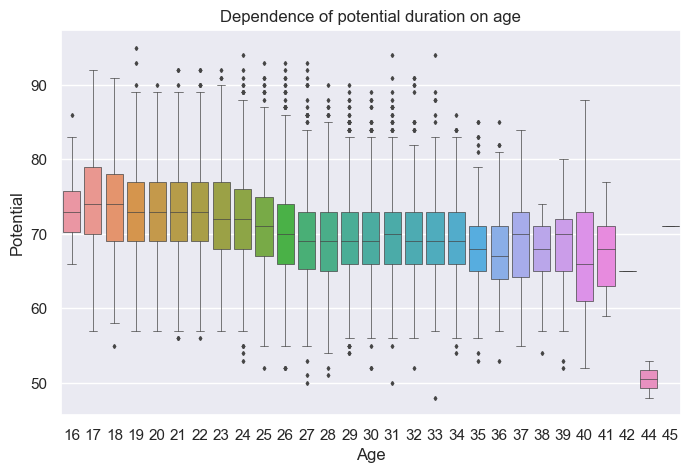

In [100]:
plt.figure(figsize=(8, 5))
plt.title('Dependence of potential duration on age')

sns.boxplot(
    data=df,
    x='Age',
    y='Potential',
    linewidth=0.5,
    fliersize=2
);

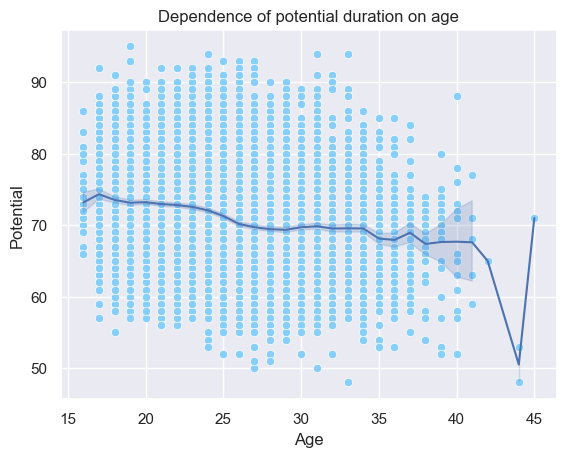

In [101]:
plt.title('Dependence of potential duration on age')

sns.scatterplot(
    data=df,
    x='Age',
    y='Potential',
    color='lightskyblue',
)

sns.lineplot(
    data=df,
    x='Age',
    y='Potential',
);

Наибольший пик потенциала наблюдается к 17. После чего он немного спадает, тем не менее, молодые игроки не всегда обладают большим потенциалом.

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

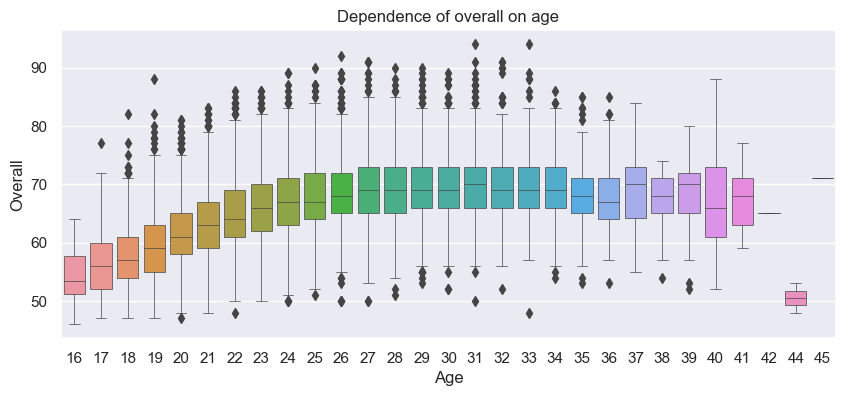

In [102]:
plt.figure(figsize=(10,4))
plt.title('Dependence of overall on age')

sns.boxplot(
    data=df,
    x='Age',
    y='Overall',
    linewidth=0.5
);

C 16 до 34 лет с повышением возраста возрастает рейтинг игрока.

In [106]:
median_pic = df[df['Age'] != 45].groupby('Age').agg({'Overall': 'median'}).nlargest(1, 'Overall').index
mean_pic = df[df['Age'] != 45].groupby('Age').agg({'Overall': 'mean'}).nlargest(1, 'Overall').index
mean_pic, median_pic

(Int64Index([31], dtype='int64', name='Age'),
 Int64Index([31], dtype='int64', name='Age'))

Пик карьеры футболисты достигают к 31 году

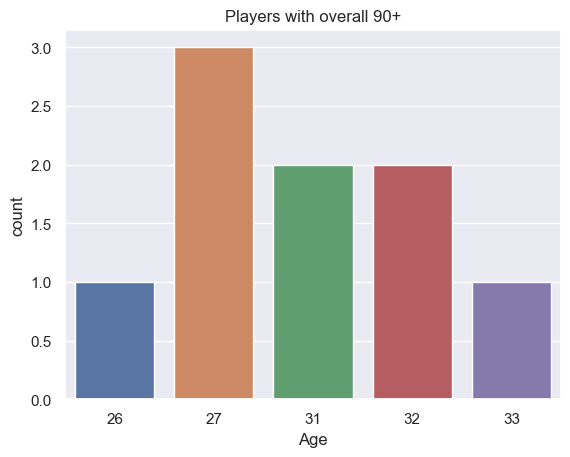

In [120]:
plt.title('Players with overall 90+')
sns.countplot(
    data=df[df['Overall'] > 90],
    x='Age'
);

Больше всего игроков с рейтингом 90+ возраста 27.

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

In [109]:
df['Wage'] = df['Wage'].apply(value)

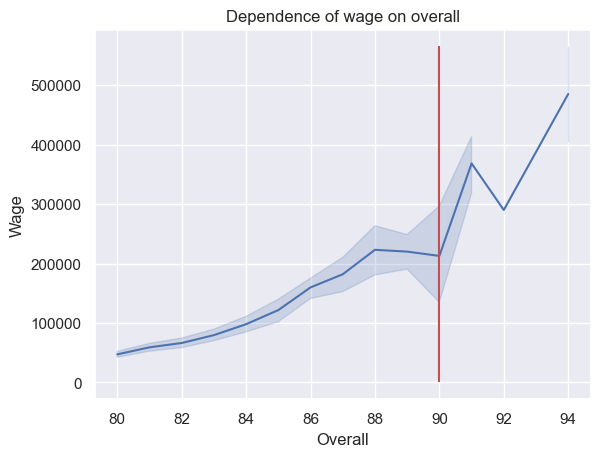

In [131]:
plt.title('Dependence of wage on overall')
sns.lineplot(
    y=df['Wage'],
    x=df[df['Overall'] >= 80]['Overall'],
)

plt.vlines(90, 0, df['Wage'].max(), color='r');

In [137]:
(df[df['Overall'] > 90]['Wage'].mean() / df[(df['Overall'] >= 80) & (df['Overall'] < 90)]['Wage'].mean()).round(1)

4.7

Средняя зарплата игроков с рейтингом 90+ больше в 4.7 раз, чем средняя зарплата игроков с рейтингом [80, 90]
